# Answer to the first homework feedback
"image band reduction by PCA"

feedback: "You could have suggested a few perspectives. How can we make the variance of the 3 bands approximately the same? Is the RGB color ..."

The variance of a band correspond to the information we have of this band, because when we use PCA, the most important dimension correspond to the dimension where the projection of X on this dimension has the most variance.

If we want to make them has the same variance, we can do the standarization on each band and then rescale it to [0,255]

But we don't know why we need to make these three bands have approximately the same variance.



#AOS1：make elastic net outshine the lasso 

AOS1 homework2

author: 
Chen GONG 
Yunfei ZHAO

date: 09/10/2020

## Introduction

The elastic net regression was invented to compensate for the lack of robustness of the lasso regression. The elastic net especially outshines the lasso when some variables are highly correlated and on the same scale.

In this homework, we hope to find a data set that satisfies: the results of elastic net regression analysis are more robust than that of Lasso regression experimentally.

We will design a regression dataset in which we want to select variables and where the elastic net gives better results in terms of stability of the set of selected variables.

We will evaluate lasso and elastic net model by these standard:
* How do the values of coefficients change by hyper-parameters. And we will tuning the hyper parameters in this step.
* Does the model has a huge variance on selecting varaibles. We will run these two models several times and we analyse it's coefficients values.
* Compare also the performance of these two models


The python library we used is below:

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Lasso, ElasticNet, LassoCV, ElasticNetCV
from sklearn.linear_model import lasso_path, enet_path
from itertools import cycle
from sklearn.preprocessing import StandardScaler

## Generate our dataset

* To simplify our presentation, we choose to have only 5 variables.
* We use multivriate normal distribution to create dataset with correlated variables.

In [ ]:
class multivariate_normal_Event:
    def __init__(self, mean, cov):
        self.mean = np.array(mean)
        self.cov = np.array(cov)
        self.coefficients = 10 * np.random.randn(len(mean))

    def sample(self, n_samples=200):
        self.X = np.random.multivariate_normal(self.mean, self.cov, n_samples)
        self.y = np.dot(self.X, self.coefficients)
        return self.X, self.y

    def heat_map_plot(self):
        data = pd.DataFrame(self.X)
        corr = data.corr()
        sns.heatmap(corr)

    def sub_dim_plot(self, col1, col2):
        plt.plot(self.X[:,col1], self.X[:,col2], 'b.')

For a two dimension multi-normal distribution, we have:
$$
{\displaystyle {\boldsymbol {\mu }}={\begin{pmatrix}\mu _{X}\\\mu _{Y}\end{pmatrix}},\quad {\boldsymbol {\Sigma }}={\begin{pmatrix}\sigma _{X}^{2}&\rho \sigma _{X}\sigma _{Y}\\\rho \sigma _{X}\sigma _{Y}&\sigma _{Y}^{2}\end{pmatrix}}.}
$$

we supose that 
* the fisrt two varibles are not correlated with any other varibles
* the three others are strongly correlated
** we have the V3 and V4 with a negative correlation of 0.9
** V3 and V5 with a positive correlation of 1
** V4 and V5 with a positive correlation of 0.8

In [ ]:
var = [1, 4, 9, 16, 25]
mean = [4, 6, 2, 9, 0]

cor = [[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0.9, 1],
       [0, 0, 0.9, 1, 0.8],
       [0, 0, 1, 0.8, 1]]
covariance = np.zeros((5, 5))
for i in range(5):
    for j in range(5):
        if i == j:
            covariance[i][j] = var[i]
        else:
            covariance[i][j] = cor[i][j] * np.sqrt(var[i]) * np.sqrt(var[j])

print(f"mean: {mean}")
print("covariance:")
covariance

mean: [4, 6, 2, 9, 0]
covariance:


array([[ 1. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  4. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  9. , 10.8, 15. ],
       [ 0. ,  0. , 10.8, 16. , 16. ],
       [ 0. ,  0. , 15. , 16. , 25. ]])

In [ ]:
evt = multivariate_normal_Event(mean, covariance)

## Show the correlation of our dataset

In [ ]:
X, y = evt.sample(n_samples=200)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  


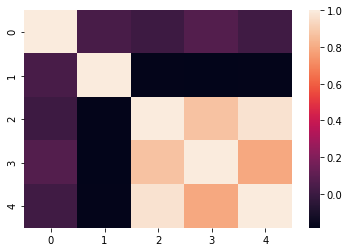

In [ ]:
evt.heat_map_plot()

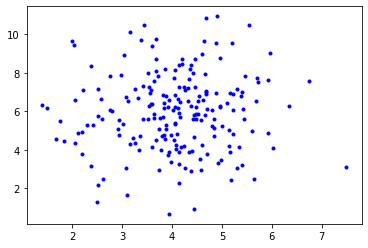

In [ ]:
evt.sub_dim_plot(0, 1)

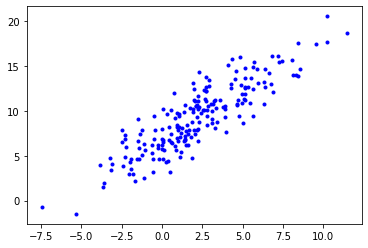

In [ ]:
evt.sub_dim_plot(2, 3)

## How do the values of coefficients evoluate by hyper-parameters
Object of lasso
$$
min \frac{1}{n_{samples}} \times ||y - Xw||^2_2
$$
Object of elastic net
$$
min \frac{1}{n_{samples}} \times ||y - Xw||^2_2
+ \lambda (\alpha ||w||_1
+ (1 - \alpha)||w||^2_2)
$$

We arbitrarly set $\alpha$ to 0.5, and for $\lambda$ we use cross validation firstly and than we use the sub optimal parameter for the rest of test.

Computing regularization path using the lasso...
Computing regularization path using the elastic net...


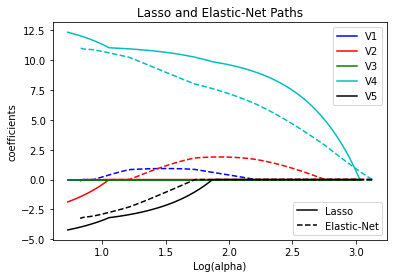

In [ ]:
eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=eps, fit_intercept=False)

print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)


# Display results

plt.figure()
colors = cycle(['b', 'r', 'g', 'c', 'k'])
log_alphas_lasso = np.log10(alphas_lasso)
log_alphas_enet = np.log10(alphas_enet)
labels = ['V1', 'V2', 'V3', 'V4', 'V5']
i = 0
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c, label=labels[i])
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)
    i = i+1

plt.xlabel('Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.axis('tight')

legend1 = plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc=4)
plt.legend()
plt.gca().add_artist(legend1)

From the figure above, we can see that the coefficient of V3 of Lasso regression is always zero, and the coefficient of V2 and V5 also quickly returns to zero.
Compared with the elastic net method, the coefficient of V3 is also always close to zero, but the other coefficients change relatively slowly

## Does the model has a huge variance on selecting varaibles

We will repeat the training and prediction process 50 times, and we want to know that if the set if selected variables is stable and if the weights correspond to the variables are stable.

In [ ]:
X, y = evt.sample(n_samples=200)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  


In [ ]:
W_0 = evt.coefficients
W_0

array([ 0.70749303, -7.77329182, -2.05161568,  6.72104066,  1.8695989 ])

In [ ]:
ntime = 50
nvar = 5
# save all estimated W in variable W
W_lasso = np.zeros((ntime, nvar))
W_elasticNet = np.zeros((ntime, nvar))
X0 = scaler.transform(X0)
lasso_alpha = LassoCV(cv=5, random_state=0).fit(X, y).alpha_
enet_alpha = ElasticNetCV(cv=5, random_state=0).fit(X, y).alpha_
lasso = Lasso(alpha=lasso_alpha)
elasticNet = ElasticNet(alpha=enet_alpha)
for i in range(ntime):
    X, y = evt.sample(n_samples=100)
    scaler = StandardScaler()
    scaler.fit(X)
    X = scaler.transform(X)
    lasso.fit(X, y)
    elasticNet.fit(X, y)
    for k in range(nvar):
        W_lasso[i, k] = lasso.coef_[k]
        W_elasticNet[i, k] = elasticNet.coef_[k]


### Analyse of result

We show the weight of these five varaibles of each test. We can found that elastic net has little variance on the weighs for all varibles besides V1, because we can see V1 in the W_0, it is 0.70749303 for our seed (it may change, we used np.random.randn(len(mean)) to generate all W). So lasso elimite is directly.

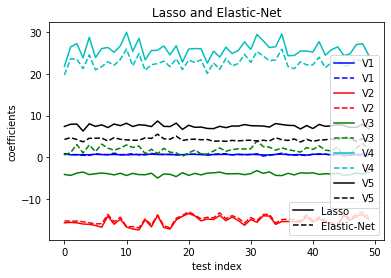

In [ ]:
plt.figure()
colors = ['b', 'r', 'g', 'c', 'k']
times = range(ntime)
labels = ['V1', 'V2', 'V3', 'V4', 'V5']
for i in range(nvar):
    l1 = plt.plot(times, W_lasso[:, i], c=colors[i], label=labels[i])
    l2 = plt.plot(times, W_elasticNet[:, i], linestyle='--', c=colors[i], label=labels[i])
plt.xlabel('test index')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net')
plt.axis('tight')

legend1 = plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc=4)
plt.legend()
plt.gca().add_artist(legend1)

##Performance comparison

In [ ]:
from sklearn.linear_model import ElasticNetCV

lasso_alpha = LassoCV(cv=5, random_state=0).fit(X, y).alpha_
enet_alpha = ElasticNetCV(cv=5, random_state=0).fit(X, y).alpha_
ntimes = 50
n_samples = 200
X0,y0 = evt.sample(1)
X0 = scaler.transform(X0)

def compute_risk(model, evt, ntimes, n_samples, X0, y0):
    pred_model = []
    for i in range(ntimes):
        X, y = evt.sample(n_samples=n_samples)
        scaler = StandardScaler()
        scaler.fit(X)
        X = scaler.transform(X)
        model.fit(X, y)
        pred = model.predict(X0)
        pred_model.append(pred)
    bias = np.mean(np.mean(pred_model) - y0)
    var = np.var(pred_model)
    risk = np.mean((pred_model - y0)**2)
    return (bias, var, risk)

risk_lasso = compute_risk(Lasso(alpha=lasso_alpha), evt, ntimes, n_samples, X0, y0)
risk_enet = compute_risk(ElasticNet(alpha=enet_alpha), evt, ntimes, n_samples, X0, y0)


In [ ]:
output = "Bias: %f\tVariance: %f\tRisk: %f"
print("Lasso: ", output % risk_lasso)
print("Elactic Net: ", output % risk_enet)

Lasso:  Bias: 1.086976	Variance: 5.076758	Risk: 6.258275
Elactic Net:  Bias: 0.382421	Variance: 4.937176	Risk: 5.083422


We use cross-validation to find the best hyperparameters of the two methods, and then calculate the bias, variance and risk of the two methods.

We repeated the experiment many times. In most cases, the risk of the Lasso method is greater than that of the elastic net method (in rare cases, the Lasso method is smaller than the elastic net method). In all cases, the Variance of the Lasso method is greater than that of the elastic net method.

This shows that the elastic net method has better performance.

##Conclusion
For a highly correlated data set, Lasso's choice of variables will become unstable. At the same time, the performance of Lasso is not as good as the elastic net.
We had hoped to see more unstable results. For example, the coefficients of V3, V4, and V5 would wander, occasionally V3 is zero, occasionally V4 is zero, and occasionally V5 is zero. But no such result occurred in our data set.